# Dataset Vehiculos Regresion Lineal - Grupo 86.
# Predicción del automovil en funcion de sus atributos.
# Pasos de la Actividad.
#### 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.
#### 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.
#### 3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.
#### 4. Dividir el dataset en Train y Test para evaluar correctamente el modelo.
#### 5. Entrenar el modelo configurando los diferentes hiperparámetros.
#### 6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.
#### 7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.
#### 8. Interpretar, analizar y documentar los resultados obtenidos.
#### 9. Crear una cuenta en GitHub y cargar los códigos de los modelos diseñados.




# 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [1]:
### Carge de las librerias necesarias.

# Manejo y analisis de estructuras de datos:
import pandas as pd
# Calculo numerico y analisis de datos:
import numpy as np
# Creación de graficos estadisticos:
import seaborn as sns 
# Creación de graficos en dos dimensiones:
import matplotlib.pyplot as plt

# Librerias para implementar modelos de ciencia de datos.

# Manejo y analisis de metricas:
from sklearn import metrics

# División de un conjunto de datos en 2 partes:
from sklearn.model_selection import train_test_split

# Predicción de valores continuos:
from sklearn.linear_model import LinearRegression

# Reportes, clasificación y graficación:
from sklearn.metrics import classification_report, confusion_matrix



In [3]:
### lectura de datos en Python y variables.
### Carga de archivos CSV

datos1 = pd.read_csv('C:/Users/braya/Desktop/dataset_vehicle/car_data.csv')


In [5]:
### Revision de filas y columnas.

print("\nPrimeras filas del dataset:\n", datos1.head(6))
print("\nNombres de las columnas:\n", datos1.columns.tolist())



Primeras filas del dataset:
         Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0           ritz  2014           3.35           5.59       27000    Petrol   
1            sx4  2013           4.75           9.54       43000    Diesel   
2           ciaz  2017           7.25           9.85        6900    Petrol   
3        wagon r  2011           2.85           4.15        5200    Petrol   
4          swift  2014           4.60           6.87       42450    Diesel   
5  vitara brezza  2018           9.25           9.83        2071    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0  
5      Dealer       Manual      0  

Nombres de las columnas:
 ['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']


In [7]:
### Revision de filas y columnas.

datos1.head(6)


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0


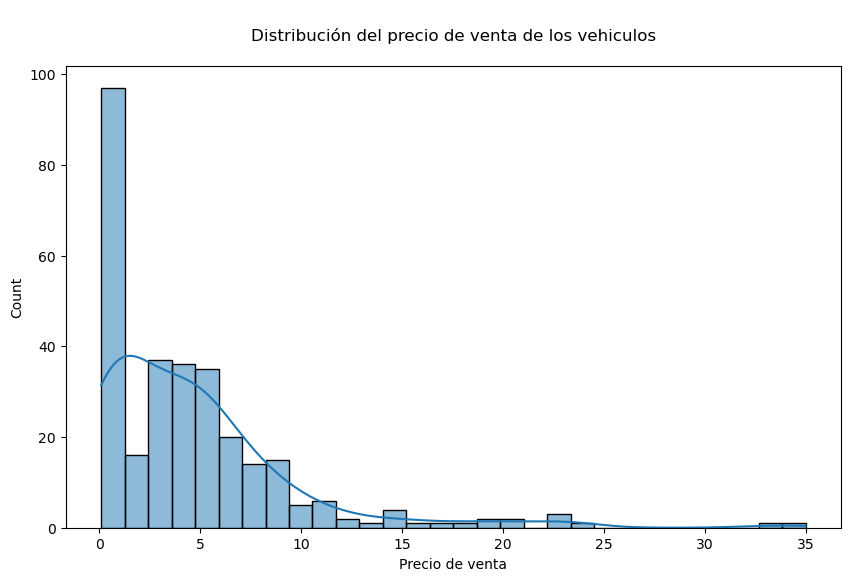

In [9]:
# Identifiación de precios.

plt.figure(figsize=(10, 6))
sns.histplot(datos1['Selling_Price'], bins=30, kde=True)
plt.title('\nDistribución del precio de venta de los vehiculos\n')
plt.xlabel('Precio de venta')
plt.show()


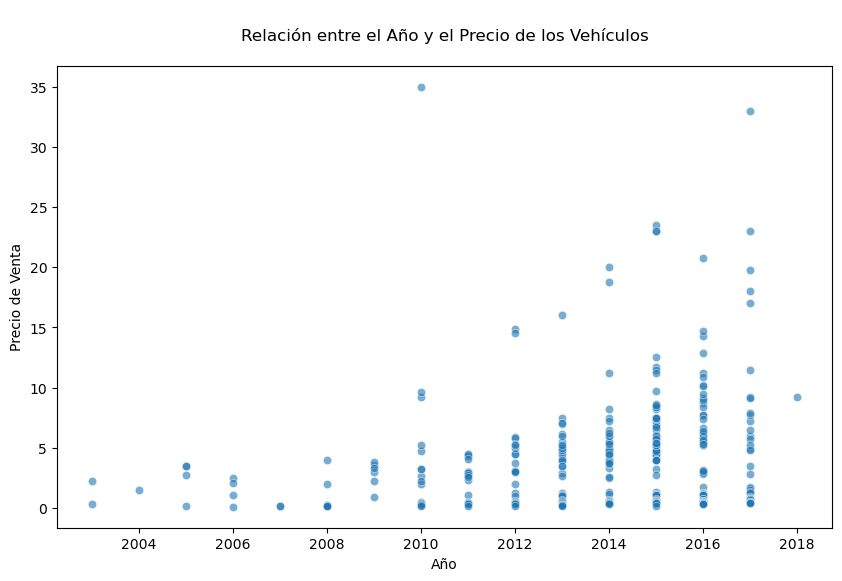

In [17]:
### Relación entre el año y el precio de los vehiculos.

year_column = 'Year'
price_column = 'Selling_Price'

if year_column in datos1.columns and price_column in datos1.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=datos1, x=year_column, y=price_column, alpha=0.6)
    plt.title('\nRelación entre el Año y el Precio de los Vehículos\n')
    plt.xlabel('Año')
    plt.ylabel('Precio de Venta')
    plt.show()
    

In [19]:
### Filtro de columnas numericas.

numeric1 = datos1.select_dtypes(include = [np.number])


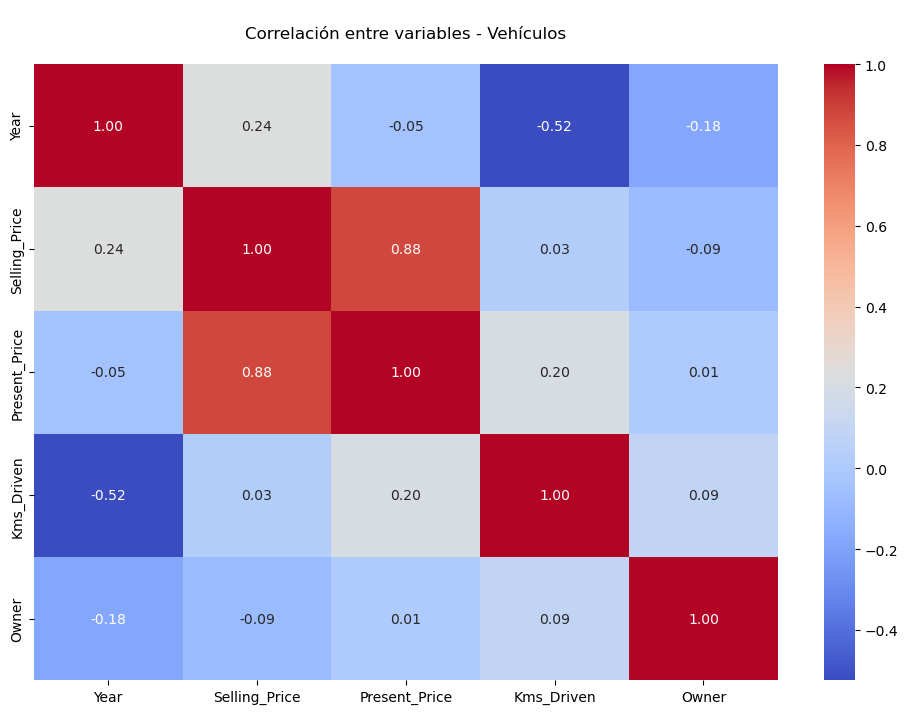

In [21]:
### Correlación entre variables numericas.

plt.figure(figsize=(12, 8))
sns.heatmap(numeric1.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('\nCorrelación entre variables - Vehículos\n')
plt.show()


In [25]:
### Consulta de datos del dataset.

print("Valores faltantes por columna:\n", datos1.isnull().sum())
print("\nNúmero de filas duplicadas:", datos1.duplicated().sum())
print("\nTipos de datos del dataset:\n", datos1.dtypes)


Valores faltantes por columna:
 Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

Número de filas duplicadas: 2

Tipos de datos del dataset:
 Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object


# 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.


In [27]:
#Revision de valores unicos en columnas categoricas.

print("Valores únicos en 'Fuel_Type':", datos1['Fuel_Type'].unique())
print("Valores únicos en 'Seller_Type':", datos1['Seller_Type'].unique())
print("Valores únicos en 'Transmission':", datos1['Transmission'].unique())


Valores únicos en 'Fuel_Type': ['Petrol' 'Diesel' 'CNG']
Valores únicos en 'Seller_Type': ['Dealer' 'Individual']
Valores únicos en 'Transmission': ['Manual' 'Automatic']


In [29]:
# Revisar estadísticas descriptivas de las columnas numéricas

print("Estadísticas descriptivas del dataset:\n", datos1.describe())


Estadísticas descriptivas del dataset:
               Year  Selling_Price  Present_Price     Kms_Driven       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.644115   38886.883882    0.247915
min    2003.000000       0.100000       0.320000     500.000000    0.000000
25%    2012.000000       0.900000       1.200000   15000.000000    0.000000
50%    2014.000000       3.600000       6.400000   32000.000000    0.000000
75%    2016.000000       6.000000       9.900000   48767.000000    0.000000
max    2018.000000      35.000000      92.600000  500000.000000    3.000000


In [31]:
# Convertir columnas categóricas en variables numéricas

datos1['Fuel_Type'] = datos1['Fuel_Type'].map({'Petrol': 0, 'Diesel': 1, 'CNG': 2})
datos1['Seller_Type'] = datos1['Seller_Type'].map({'Dealer': 0, 'Individual': 1})
datos1['Transmission'] = datos1['Transmission'].map({'Manual': 0, 'Automatic': 1})


In [37]:
# Verificar los cambios

print("Dataset después del preprocesamiento:\n", datos1.head(6))


Dataset después del preprocesamiento:
         Car_Name  Year  Selling_Price  Present_Price  Kms_Driven  Fuel_Type  \
0           ritz  2014           3.35           5.59       27000          0   
1            sx4  2013           4.75           9.54       43000          1   
2           ciaz  2017           7.25           9.85        6900          0   
3        wagon r  2011           2.85           4.15        5200          0   
4          swift  2014           4.60           6.87       42450          1   
5  vitara brezza  2018           9.25           9.83        2071          1   

   Seller_Type  Transmission  Owner  
0            0             0      0  
1            0             0      0  
2            0             0      0  
3            0             0      0  
4            0             0      0  
5            0             0      0  


# 3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.


In [65]:
# Calcular la correlación entre las variables numéricas
# Filtrar solo columnas numéricas

numeric1 = datos1.select_dtypes(include=[np.number])  

# Calcular la matriz de correlación

correlation_matrix = numeric1.corr()


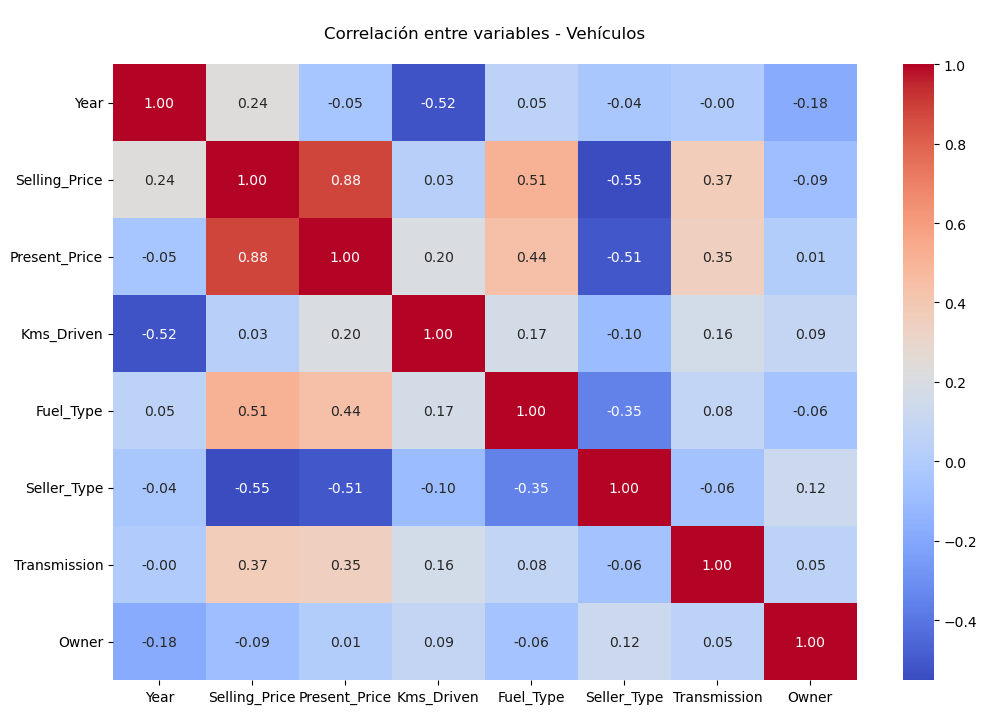

In [67]:
# Visualizar la matriz de correlación

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('\nCorrelación entre variables - Vehículos\n')
plt.show()


In [69]:
# Seleccionar las características más relevantes para el modelo
# Usar un umbral de correlación para filtrar las características

threshold = 0.5
relevant_features = correlation_matrix[abs(correlation_matrix['Selling_Price']) > threshold].index.tolist()

print("Características relevantes para el modelo:", relevant_features)


Características relevantes para el modelo: ['Selling_Price', 'Present_Price', 'Fuel_Type', 'Seller_Type']


# 4. Dividir el dataset en Train y Test para evaluar correctamente el modelo.


In [71]:
# Paso 4: Dividir el dataset en Train y Test

from sklearn.model_selection import train_test_split

# Definir las características (X) y la variable objetivo (y)

X = datos1.drop(columns=['Selling_Price', 'Car_Name'])
y = datos1['Selling_Price']

# Dividir el dataset en Train y Test (80% para entrenamiento y 20% para prueba)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar las dimensiones de los conjuntos

print("Dimensiones del conjunto de entrenamiento:", X_train.shape, y_train.shape)
print("Dimensiones del conjunto de prueba:", X_test.shape, y_test.shape)


Dimensiones del conjunto de entrenamiento: (240, 7) (240,)
Dimensiones del conjunto de prueba: (61, 7) (61,)


# 5. Entrenar el modelo configurando los diferentes hiperparámetros.




In [73]:
# Paso 5: Entrenar el modelo

from sklearn.linear_model import LinearRegression

# Crear el modelo de regresión lineal

model = LinearRegression()

# Entrenar el modelo con el conjunto de entrenamiento

model.fit(X_train, y_train)

# Verificar los coeficientes del modelo

print("Coeficientes del modelo:", model.coef_)
print("Intercepción del modelo:", model.intercept_)


Coeficientes del modelo: [ 3.63622678e-01  4.39942393e-01 -5.46717653e-06  1.32389894e+00
 -1.16866879e+00  1.63644708e+00 -9.20154941e-01]
Intercepción del modelo: -730.6839480706624


# 6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.




In [75]:
# Paso 6: Evaluar el desempeño del modelo

from sklearn.metrics import mean_squared_error, r2_score

# Predecir los precios de venta en el conjunto de prueba

y_pred = model.predict(X_test)

# Calcular el error cuadrático medio (MSE) y R²

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Error Cuadrático Medio (MSE): {mse}')
print(f'R²: {r2}')


Error Cuadrático Medio (MSE): 3.5289272538921455
R²: 0.8468053957656777


# 7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.


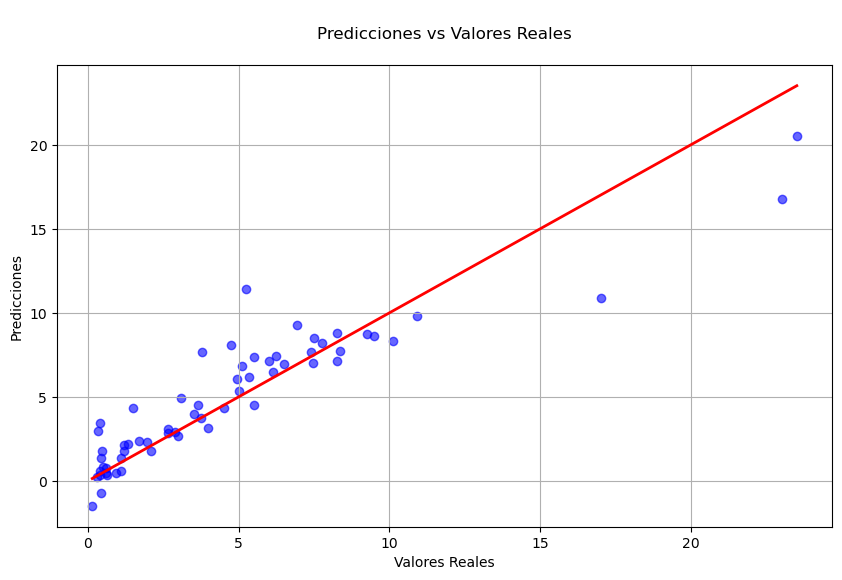

In [77]:
# Paso 7: Visualizar los resultados del modelo

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.title('\nPredicciones vs Valores Reales\n')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.grid(True)
plt.show()


# 8. Interpretar, analizar y documentar los resultados obtenidos.

# interpretación y análisis de los resultados.
#### 1. distribución del Precio de ventas:
##### Analizando el histograma, se comprende que la mayoría de los vehículos estan en un rango de precios bajo, con solo una minoría de los casos como más costosos. Esto quiere decir que en el mercado de autos usados es común que la mayoría de las personas compre coches económicos, por lo cual es más asequible en comparación a los autos de lujo o con condiciones de alta calidad. En casos extremos estos pueden desbalancear un poco los modelos, ya que la regresión lineal tiende a verse afectado por estos valores atípicos.

#### 2. Relación Año-Precio:
##### Analizando el grafico de dispersión muestra que, los autos más nuevos tienden a tener precios de ventas más elevados, mientras que los modelos más viejos pierden valor con el tiempo. Esta relacion lineal negativa tiene mucho sentido, ya que la depreciación de los autos sucede durante los próximos años. La variable "años" es fundamental para el modelo debido que es determinante para el precio final del auto. Esta relación entre el año y el precio tambien puede ser vista en el contexto de la oferta y la demanda. Los autos nuevos generalmente tienen una mayor demanda debido que los compradores buscan vehículos con menor kilometraje, mejores condiciones mecánicas y más garantías.

#### 3. Correlaciones entre Variables:
##### Verificando el mapa de calor se identifica diferentes correlaciones y variables que dejan ver el precio presente y el precio de venta del vehículo. Esto sugiere que los autos tuvieron un precio más alto y al ser nuevos siguen manteniendo un valor elevado en el mercado de segunda mano, lo que refleja la percepción de calidad y durabilidad asociada a estos vehículos. Por otro lado, la correlación negativa entre el "año" y el "precio" refuerza la idea de que los autos más viejos tienden a depreciarse y, por lo tanto, tienen un valor más bajo. Estos Hallazgos son coherentes con las dinámicas del mercado, donde el precio inicial y la antigüedad del vehículo juegan un papel crucial en determinar su valor en el mercado de segunda mano. En resumen, los resultados del análisis son consistentes con las expectativas del sector y ayuda a entender mejor las tendencias que afectan el precio de los autos usados.

#### 4. evaluación del modelo:
##### El grafico de predicciones frente a valores reales muestra que el modelo de regresión lineal realiza una predicción bastante precisa de los precios de los autos, ya que la mayoría de los puntos se alinean bien con la línea diagonal, lo que indica que las predicciones se acercan a los valores reales. Ademas, los puntos en su mayoría estan dispersos principalmente entre 0 y 15, lo que sugiere que las predicciones son bastantes consistentes con una pequeña variabilidad. El coeficiente de determinación (R^2) de 0.84 indica que el modelo es capaz de explicar el 84% de la variabilidad en los precios de los autos, lo que es buen indicativo de que la regresión lineal captura la mayor parte de la relación entre variables predictoras y el precio final del vehículo. Sin embargo, un R^2 de 0.84 tambien sugiere que el modelo no es perfecto, ya que aún hay un 16% de variabilidad que no está siendo explicado en el modelo. Esto podria deberse a presencia de variables importantes no incluidas en el modelo, o bien a relaciones no lineales entre las variables. Por último, el error cuadrático (MSE) de 3.52 sugiere que, aunque el modelo realiza predicciones relativamente precisas, todavía hay un margen de mejora. Este valor implica que el modelo tiene cierto nivel de error en sus predicciones, lo cual podria reducirse mediante incorporación de características adicionales.

#### 5. Conclusión:
##### En conclusión, el modelo de regresión lineal utilizado para predecir los precios de los autos muestra un rendimiento general bastante bueno, con un R^2 de 0.84 que indica que el modelo explica una buena parte de la variabilidad de los precios. Ademas, un MSE de 3.52, que es relativamente bajo indica que el error promedio en las predicciones es pequeño, lo que refleja una alta precisión del modelo. Sin embargo, a pesar de estos buenos resultados, sigue existiendo cierto margen de mejora, ya que siempre puede haber factores no considerados en el modelo que podrían afectar la precisión de las predicciones, o posibles relaciones no lineales entre las variables que la regresión lineal no puede capturar completamente.

# 9. Crear una cuenta en GitHub y cargar los códigos de los modelos diseñados.

# https://github.com/Brayan-Gif-CMD/Tarea_3_Dataset_vehiculos_Grupo_86.git
